# ML Intro examples
Materials related to [the slides](https://docs.google.com/presentation/d/1mZs-2_qrVCqFg0r0QUikQKxonaiQ3peStwGhkTL-WHc/edit?usp=sharing).

Source: [Python Data Science Handbook by Jake VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_formats=['svg']  # Alternative: InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set(palette='dark')

## k-means for color compression

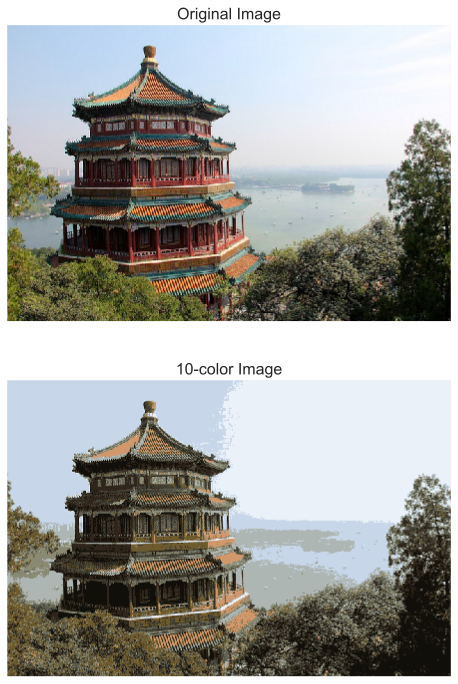

In [2]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings('ignore')

china = load_sample_image("china.jpg")

data = china / 255.0 # use 0...1 scale
data = data.reshape(427*640, 3)

NUM_COLORS = 10

kmeans = MiniBatchKMeans(n_clusters=NUM_COLORS)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(2, 1, figsize=(15, 12), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title(f'{NUM_COLORS}-color Image', size=16);

# fig.savefig('color-compression.png', dpi='figure', transparent=True)

## Bias-Variance Tradeoff
### Underfitting vs. overfitting

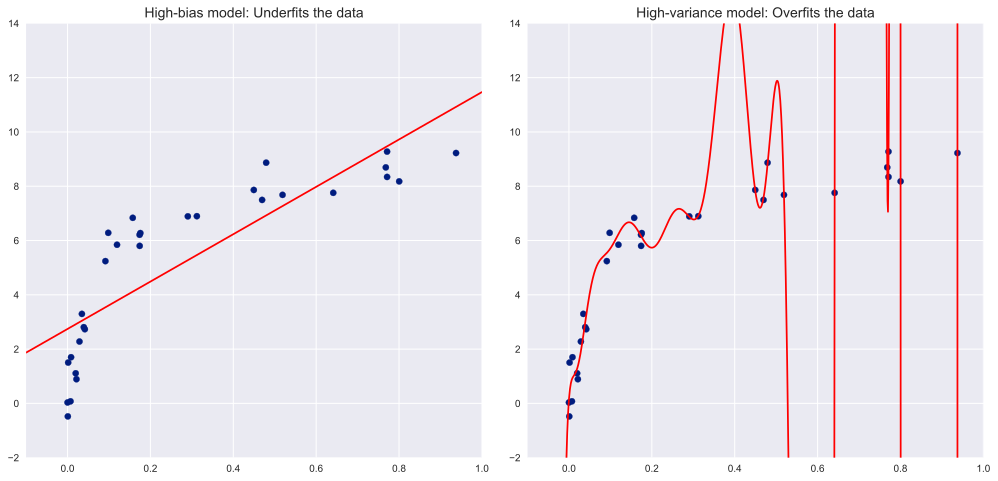

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    rng = np.random.RandomState(rseed)  # randomly sample the data
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='red')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='red')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14);

### Validation Curve, bias vs. variance

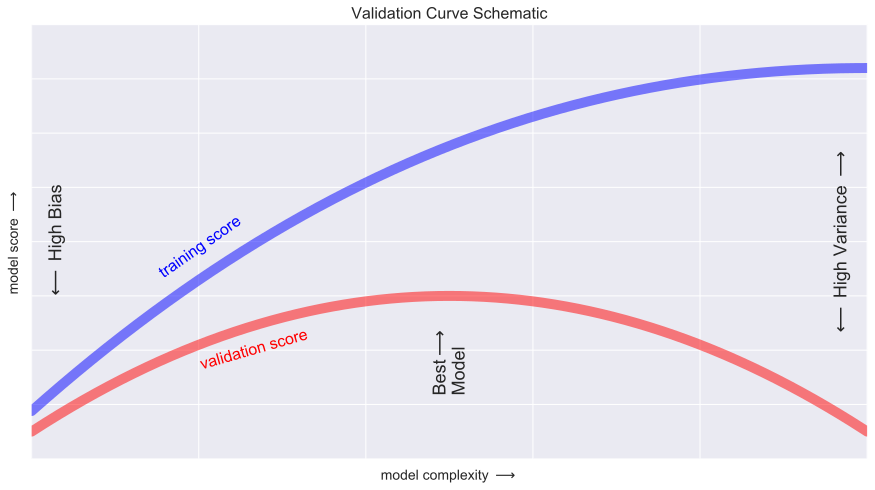

In [4]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.13, "training score", rotation=35, size=16, color='blue')
ax.text(0.2, -0.08, "validation score", rotation=16, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16);

# fig.savefig('validation-curve.png', dpi='figure', transparent=True)